
# <center> **CNN ARCHITECTURES AND TRANSFER LEARNING** </center>

*“It can be concluded that from now on, deep learning with CNN has to be considered as the primary candidate in essentially any visual recognition task.” [Razavian 2014]*

## **Outline**
1. [**Pre-trained CNN Models**](#pre-trained)
2. [**Most common CNN architectures**](#CNN_arch)
3. [**Transfer Learning: using pre-trained DL models**](#TL)
4. [**Data Augmentation**](#DA)



In [2]:
#@title **Student:** Mount the Drive  (If you are in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/2024-2/IA2/Inteligencia Artificial -  II/ai-2-uis-student')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/2024-2/IA2/Inteligencia Artificial -  II/ai-2-uis-student


In [1]:
#@title **Load libraries**
#@markdown Here is important to change to GPU

import sys
import numpy as np
import tensorflow as tf
from sklearn import datasets
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.1


#**1. Pre-trained CNN Models** <a name="pre-trained"></a>

**CNN models are slowly but in training process**, then we can use a **pre-trained model**.

- A pre-trained model is a model that was trained on a large benchmark dataset, for instance on the image-net dataset.
- Building and training a large deep-learning model without robust computational support it's almost impossible.
- You can improve an existing architecture, you don't have to start with an empty model.
- **A new standard for industry best practices**.
- You can use for  cases from **transfer learning**, **prediction**, and **feature extraction**.

- **[ImageNet](http://www.image-net.org/):** is a dataset of over 15 million labeled high-resolution images belonging to roughly 22,000 categories.
    - ImageNet Large-Scale Visual Recognition Challenge (ILSVRC)
    - 1000 images in each of 1000 categories

**Go to the action!**
    - We are going to load and use a very well know CNN architecture. In next subsection we explain a little about each strategy.


In [3]:
#@title **Coding** Time to load my first pre-trained CNN
model_ResNet152 = tf.keras.applications.ResNet152(weights='imagenet')
model_ResNet152.summary()

242900224/242900224 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "resnet152"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 60,419,944 (230.48 MB)

 Trainable params: 60,268,520 (229.91 MB)

 Non-trainable params: 151,424 (591.50 KB)

im_ele1:  <class 'PIL.Image.Image'> (1, 224, 224, 3)


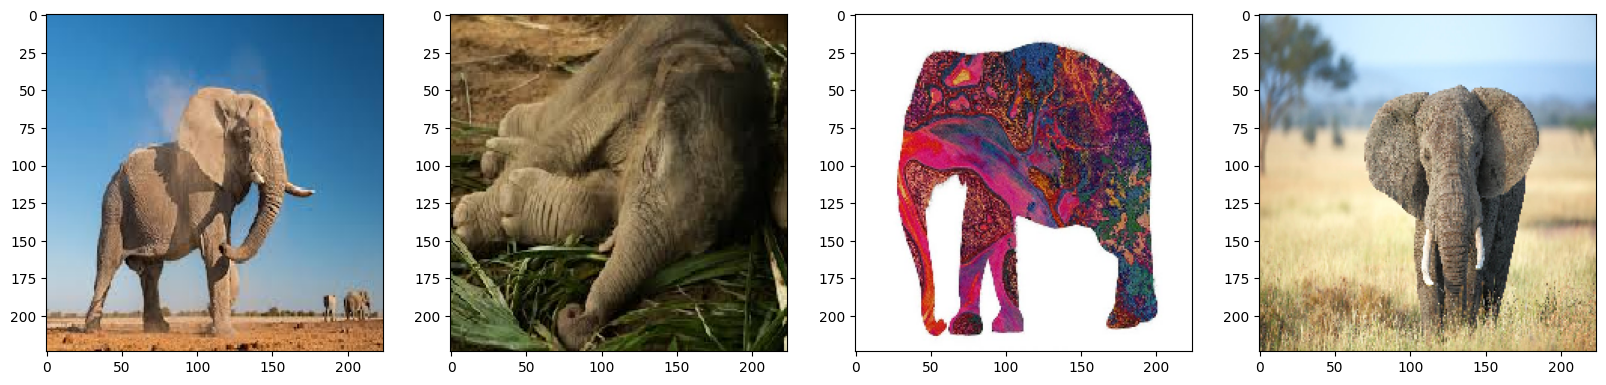

In [7]:
#@title **Coding:** Time to play with a pre-trained image.

images = ["imgs/ele4.jpeg", "imgs/ele1.jpeg", "imgs/ele3.jpg", "imgs/ele2.jpg"]
elephant_img = []; preprocessing_img = []

for ind, value in enumerate(images):
  pil_img = tf.keras.preprocessing.image.load_img(value, target_size=(224, 224))
  preprocessing_img.append(pil_img)
  elephant_img.append(np.expand_dims(tf.keras.preprocessing.image.img_to_array(pil_img), axis=0))


print("im_ele1: ", type(preprocessing_img[1]), elephant_img[1].shape)

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1, 4, 1)
ax = plt.imshow(preprocessing_img[0]);
ax = fig.add_subplot(1, 4, 2)
ax = plt.imshow(preprocessing_img[1]);
ax = fig.add_subplot(1, 4, 3)
ax = plt.imshow(preprocessing_img[2]);
ax = fig.add_subplot(1, 4, 4)
ax = plt.imshow(preprocessing_img[3]);

In [8]:
#@title **Coding** Time to predict a class for the image
features_res = model_ResNet152.predict(elephant_img[-1])
print(features_res.shape, np.argmax(features_res, axis=1))
tf.keras.applications.imagenet_utils.decode_predictions(features_res)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
(1, 1000) [386]


[[('n02504458', 'African_elephant', 0.8871154),
  ('n01871265', 'tusker', 0.03798863),
  ('n04399382', 'teddy', 0.008764542),
  ('n02454379', 'armadillo', 0.008295229),
  ('n01704323', 'triceratops', 0.0077382624)]]

64 (7, 7, 3, 64)


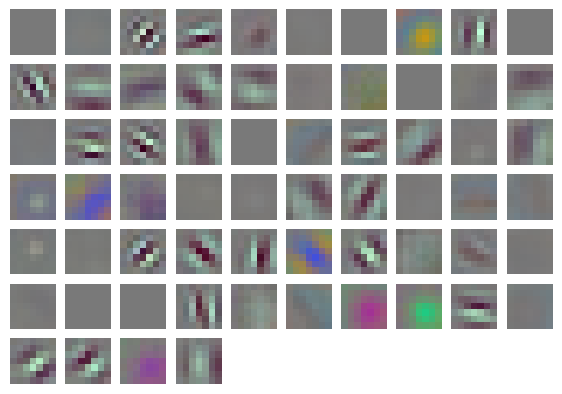

In [10]:
#@title **Coding** representation basis
w = model_ResNet152.get_weights()[0]
w = (w-np.min(w))/(np.max(w)-np.min(w))
print(w.shape[-1], w.shape)

plt.figure(figsize=(7,7))
for i in range(w.shape[-1]):
    plt.subplot(10,10,i+1)
    plt.imshow(w[:,:,:,i])
    plt.axis("off")

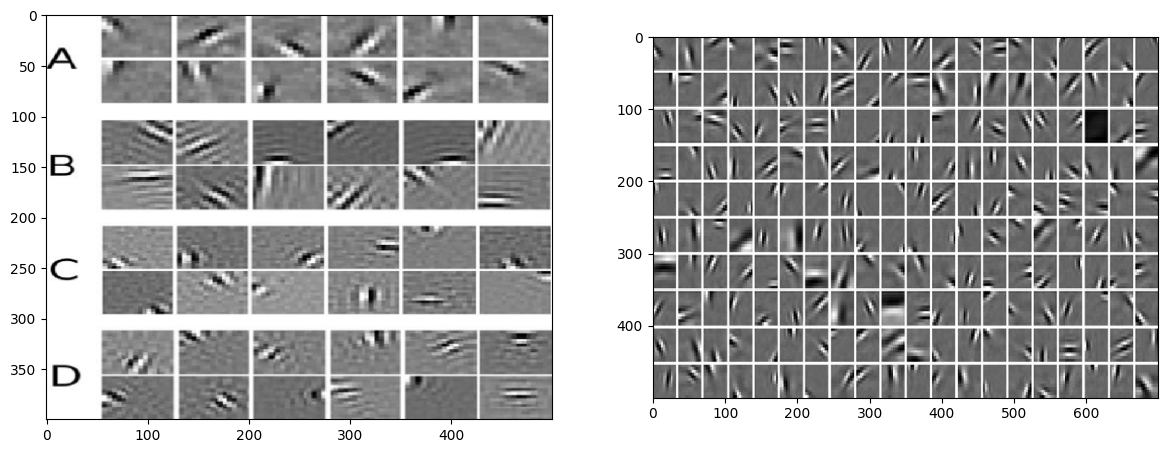

In [11]:
#@title Did you see the importance? It is very close to some evidence of receptive field responses

im_v1 = tf.keras.preprocessing.image.load_img("imgs/v1.png", target_size=(400, 500))
im_v2 = tf.keras.preprocessing.image.load_img("imgs/gabor.png", target_size=(500, 700))

fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1, 4, 1)
ax = plt.imshow(im_v1);
ax = fig.add_subplot(1, 4, 2)
ax = plt.imshow(im_v2);

# **2. Most common CNN architectures** <a name="CNN_arch"></a>

Today, there are many CNN architectures available for many different tasks. Among the most important, we can list:


### **2.1 LeNet**
Proposed in [gradient-based learning applied to document recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf). Used on large scale to automatically classify hand-written digits

<img width="400px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/lenet.png?raw=true">

- CNNs are the foundation of modern state-of-the-art deep learning-based computer vision.
- It only has 7 layers, CNN: (C1, C3 and C5), Pool: (P1, P2) and Fully:(F1, F2)
- It was able to achieve an error rate below 1% on the MNIST dataset

### **2.2 AlexNet**

Proposed in [ImageNet Classification with Deep Convolutional Neural Networks](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf), it is the first large convolutional net.

The network is similar to LeNet  but deeper, with more filters stacked convolutional layers.

<img width="700px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/Alexnet.png?raw=true">
- Similar to Lenet but with 5 conv2D and 3 fully dense layers
- It was a winner of 2012 ImageNet ILSVRC challenge **(error 16.4)**
- Relu activation function is used instead of Tanh to add non-linearity
- Use dropout to deal with overfitting
- The kernels of the third convolutional layer are connected to all kernel maps in the second layer
- AlexNet takes 90 epochs which were trained for 6 days simultaneously on two Nvidia Geforce GTX 580 GPUs
- 60 million parameters

### **2.3 VGGNet**

Introduced in [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556). There exist two versions **VGG16**, **VGG19**

<img width="500px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/VGG.png?raw=true">

The model achieves 92.7% top-5 on the ImageNet dataset and trained for weeks and was using NVIDIA Titan Black GPUs.
- 16/19 convolutional layers + pooling + fully connected
- Input is 224 x 224 x 3 images
- Filters are 3 x 3 that basically capture the notion of left/right, up/down, center
- Five max-pooling layers
- Three Fully-Connected (FC) layers
- Hidden layers have rectification (ReLU)
- It is slow and the model is over 533MB
- 180 million parameters
- VGG NET win in ILSVRC 2014 with an error of **7.3**

### **2.4 ResNet**

Feedforward neural networks with shortcut connections. Proposed in [Deep Residual Learning for Image Recognition
](https://arxiv.org/pdf/1512.03385.pdf)


<img width="700px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/resnet.png?raw=true">

<img width="300px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/resnet2.png?raw=true">

- Deeper network starts to converge. Nevertheless, a degradation problem has been exposed
- This architecture is easy to optimize, but the “plain” networks
- ResNet model has fewer filters and lower complexity than VGG nets
- More layers is better but because of the vanishing gradient problem
    - There is Resnet with 34, 101 and 152 layers
- Resnet win ILSVRC challence on 2015 with an **error 3.6**.
### BETTER THAN HUMAN PERFORMANCE!

### **2.5 GoogLeNet (Inception V1)**

Proposed in [Going deeper with convolutions](https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf?source=post_page---------------------------)

<img width="1000px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/Googlenet.png?raw=true">

- Winner of ImageNet 2014 (Second position for VGG)
- 7 million parameters
- **Network in networks:** It contains 1×1 Convolution at the middle of the network

<img width="300px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/oneConv1.png?raw=true">
A total of (14×14×48)×(5×5×480) = 112.9M operations
<img width="300px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/OneConv2.png?raw=true">

First: (14×14×16)×(1×1×480) = 1.5M

Second: (14×14×48)×(5×5×16) = 3.8M


Total.  1.5M + 3.8M = 5.3M

- Also reduce the overfitting problem.
- A global average pooling is used at the end of the network instead of a fully connected layers
- Inception win the ILSRVC challenge of 2015 with an error of **3.38**

### **2.6 InceptionV3**

Proposed in CVPR [Rethinking the Inception Architecture for Computer Vision](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Szegedy_Rethinking_the_Inception_CVPR_2016_paper.pdf?source=post_page---------------------------)

<img width="1000px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/inceptionv.png?raw=true">


- **MODULE A: Factorizing Convolutions:**  reduce the number of connections/parameters without lost efficiency
    - Two 3×3 convolutions replaces one 5×5 convolution.
      - 1 layer of 5x5=25.
      - 2 layers of 3x3= (3x3)*2=18
      - 28% parameter reduction
      
<img width="300px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/inception1.png?raw=true">

- **MODULE B: Factorization Into Asymmetric Convolutions:**
    - a 3X3 filter is replaced by one filter of 3x1  followed by one 1x3 convolution
        - 3x3=9 but (1x3)+ (3x1) = 6 (33% parameter reduction)
    
<img width="300px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/inception2.png?raw=true">     

- **MODULE C: Factorization Into Asymmetric Convolutions:**

<img width="300px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/inception3.png?raw=true">



- It has a total of 42 layers.
- lower error rate for image classification in ILSVRC in 2016
- Much more efficient than VGGNet

### **2.7 Inception-ResNet-V2**

Proposed in CVPR [Rethinking the Inception Architecture for Computer Vision](https://arxiv.org/pdf/1602.07261.pdf)

<img width="400px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/resnet.png?raw=true">



- Converting Inception modules to Residual Inception blocks.
- Adding more Inception modules.
- Adding a new type of Inception module (Inception-A) after the Stem module.


### **2.8 Xception**

Proposed in CVPR [Xception: Deep Learning with Depthwise Separable Convolutions](https://arxiv.org/pdf/1610.02357.pdf)

<img width="600px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/xception.png?raw=true">

This net is a  extreme version of Inception, with a modified depthwise separable convolution.

- The results shows a better performance than Inception-v3
- Modify the design, by doing, the pointwise convolution followed by a depthwise convolution
- In Xception, there is **NO** intermediate ReLU non-linearity  in the defined  depthwise module
- There are residual (or shortcut/skip) connections


### **2.9 Mobilenet**

Proposed in CVPR [MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications](https://arxiv.org/pdf/1801.04381.pdf)

<img width="700px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/mobilenet.png?raw=true">

Designed for restricted resources or embedded application, whose main features are the small size, low-latency and low-power rather than the classification performance.

- This net fully  uses depthwise separable convolutions to reduces the number of parameters
- The net follows the structure [depthwise - pointwise] convolutions

Now, there exist the [mobilenet-V2](https://arxiv.org/pdf/1801.04381.pdf)

- Linear bottlenecks between the layers
- shortcut connections between the bottlenecks

### **2.10 Densenet**

Proposed in CVPR [Densely Connected Convolutional Networks](https://arxiv.org/abs/1608.06993)

<img width="700px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/densenet.png?raw=true">

- This net is quite similar to Resnet but concatenate previous layers rather than merge using and additive method.

- Improve the declined accuracy caused by the vanishing gradient

- This image shows a block of five layers dense with a growth rate of four
- Transition Layer applies batch normalization using downsampling when further layers has lower dimension

#### **Brief comparison**

A summary of available models and their respective perfomance on Imagent is [here](https://keras.io/api/applications/)

<img width="500px" src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/architectcomparison.png?raw=true">

In [12]:
#@title **Solution:** Change size
m_inception = tf.keras.applications.InceptionV3(weights='imagenet')
m_MobileNetV2 = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(128, 128, 3), include_top=True)
m_MobileNetV2.summary()

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 3,538,984 (13.50 MB)

 Trainable params: 3,504,872 (13.37 MB)

 Non-trainable params: 34,112 (133.25 KB)

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


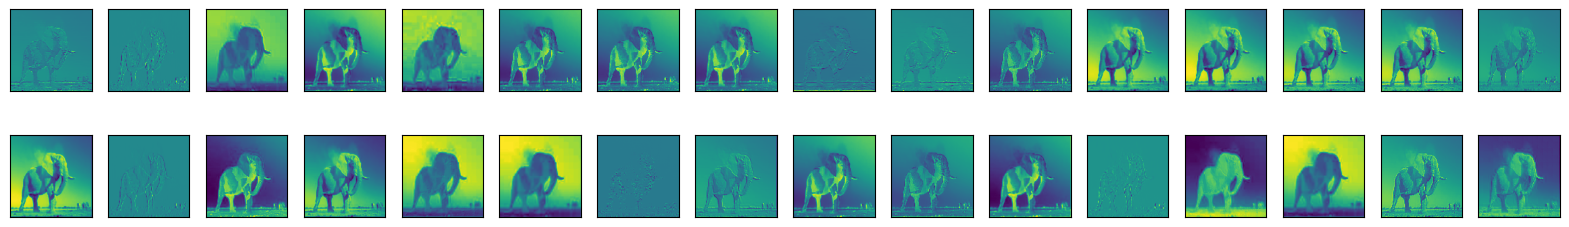

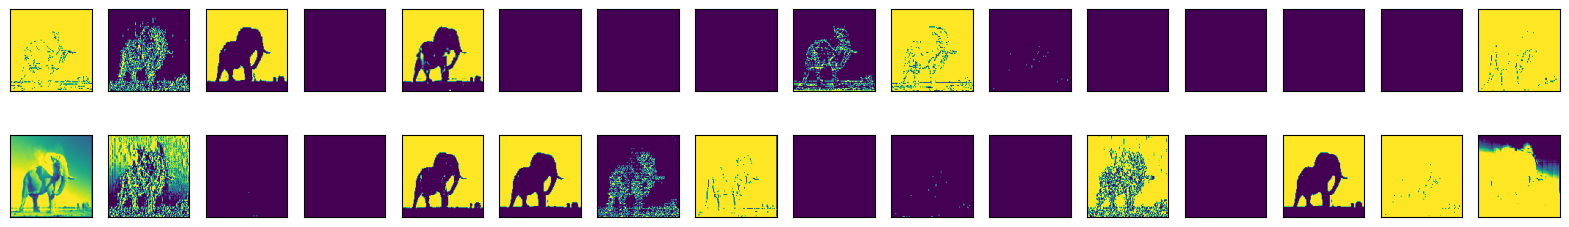

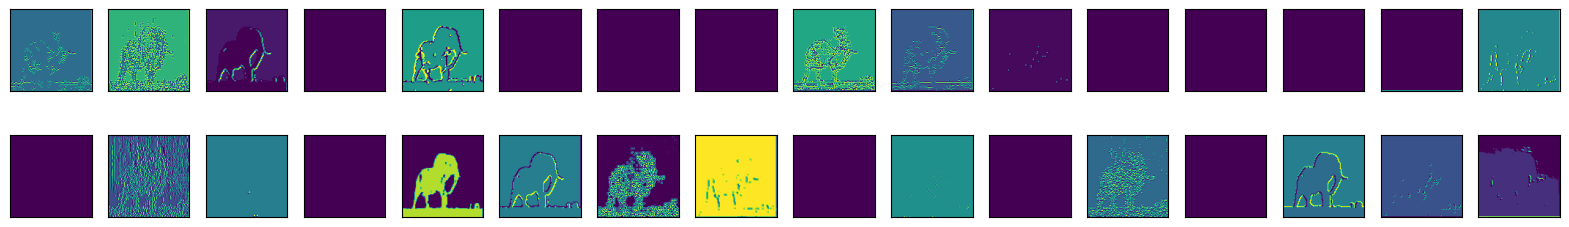

In [13]:
#@title **Solution:** See the activations from each pre-trained net
m_MobileNetV2 = tf.keras.applications.MobileNetV2(weights='imagenet')

layer_outputs = [layer.output for layer in m_MobileNetV2.layers ]
activation_model = tf.keras.models.Model(inputs=m_MobileNetV2.input, outputs=layer_outputs)
activations = activation_model.predict(elephant_img[0])

plt.figure(figsize=(20,3))
for i in range(32):
    plt.subplot(2,16,i+1)
    plt.xticks([]);plt.yticks([]); plt.grid(False)
    plt.imshow(activations[1][0,:, :, i], cmap='viridis')

plt.figure(figsize=(20,3))
for i in range(32):
    plt.subplot(2,16,i+1)
    plt.xticks([]);plt.yticks([]); plt.grid(False)
    plt.imshow(activations[3][0,:, :, i], cmap='viridis')

plt.figure(figsize=(20,3))
for i in range(32):
    plt.subplot(2,16,i+1)
    plt.xticks([]);plt.yticks([]); plt.grid(False)
    plt.imshow(activations[6][0,:, :, i], cmap='viridis')

# **3. Transfer Learning: using pre-trained DL models** <a name="TL"></a>
- "*Standing on the shoulder of giants*". Chartres
- "*If I have seen further it is by standing on the shoulders of Giants*". Newton

It's a way to quickly solve a classification problem from a pre-trained image. In transfer learning for image classification, if a model was trained on a large and general enough dataset, this model could be used as a generic model of the visual world.

- Start by learning patterns of other problems.

**Advantages**
- It works into the same deep learning scheme.
- Some SoA is based on transfer learning

**Steps**

- Load a pre-trained model: Inception, MobileNet
- Train some layers and leave the others frozen
    - Frozen layers does not change during training

##### **CNN Models**

The CNN achitectures, according to Yosinski et al. (2014), *if first-layer features are general and last-layer features are specific, then there must be a transition from general to specific somewhere in the network*

- if you’ve a small dataset and a large number of parameters, you’ll leave more layers frozen to avoid overfitting.
- The base convolutional network already contains  visual features that are generically for image problems, while the final is specific to the original classification task.
    

**Go again to the action!**

We should load cifar10

In [14]:
#@title **Coding:** Load CIFAR 10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print ("CIFAR 10")
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
CIFAR 10
(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


In [15]:
#@title **Coding** Time to organize the data
x_train = x_train.reshape([-1, 32, 32, 3])
x_test = x_test.reshape([-1, 32, 32, 3])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_test = tf.keras.utils.to_categorical(y_test)
y_train = tf.keras.utils.to_categorical(y_train)

x_train /= 255
x_test /= 255


print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0], "y_train:", y_train.shape)
print('Number of images in x_test', x_test.shape[0], "y_test: ", y_test.shape)

x_train shape: (50000, 32, 32, 3)
Number of images in x_train 50000 y_train: (50000, 10)
Number of images in x_test 10000 y_test:  (10000, 10)


### **3.1. Freeze the convolutional base**

A basic transfer learning approach is implemented when the *new dataset* is **small and similar** to *original dataset*

- We will be training only the classifiers (FC layers). To train the entire network can lead to **overfitting**
- The first step is to select a pre-trained model: Inception, VGG, and Resnet, among others.
- Then freeze all layers except FC layers and re-train.

We will try with mobilenet because reduced size (16MB)

In [16]:
#@title **Coding** Load my first pre-trained CNN
model_A =  tf.keras.applications.MobileNetV2(input_shape=x_train[0].shape, weights='imagenet', include_top=False)
model_A.trainable = False
model_A.summary()

<ipython-input-16-93f8663aad14>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model_A =  tf.keras.applications.MobileNetV2(input_shape=x_train[0].shape, weights='imagenet', include_top=False)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 16, 16, 32)     │            864 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 16, 16, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 16, 16, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 16, 16, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 16, 16, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 16, 16, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 16, 16, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 16, 16, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 16, 16, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 16, 16, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 16, 16, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 17, 17, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 8, 8, 96)       │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [17]:
#@title **Coding** Time to create some layers to add
prediction_layer = tf.keras.layers.Dense(10, activation='softmax')
flatten_layer = tf.keras.layers.Flatten()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # To MobileNet CNNs

In [18]:
#@title **Coding** we can adapt the pre-trained model on a new model
model_B_on_A = tf.keras.Sequential([
  tf.keras.layers.Input(shape=([32, 32, 3])),
  model_A,
  global_average_layer,
  flatten_layer,
  prediction_layer
])

In [19]:
#@title **Coding** the summary of the models and layers to train
model_B_on_A.summary()
print("number of layers to train: ", len(model_B_on_A.trainable_variables))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

number of layers to train:  2


In [20]:
#@title **Coding** Now we fit the model to the new dataset
learning_rate= 0.1
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
model_B_on_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])
history = model_B_on_A.fit(x_train, y_train, epochs=20,verbose=1, batch_size=32,validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.2558 - loss: 2.0350 - val_accuracy: 0.2883 - val_loss: 1.9684
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2886 - loss: 1.9638 - val_accuracy: 0.2691 - val_loss: 2.0351
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2869 - loss: 1.9705 - val_accuracy: 0.2820 - val_loss: 1.9876
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2902 - loss: 1.9520 - val_accuracy: 0.2929 - val_loss: 1.9448
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2914 - loss: 1.9518 - val_accuracy: 0.2981 - val_loss: 1.9440
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2966 - loss: 1.9492 - val_accuracy: 0.3012 - val_loss: 1.9574
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2940 - loss: 1.9550 - val_accuracy: 0.2940 - val_loss: 1.9708
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2945 - loss: 1

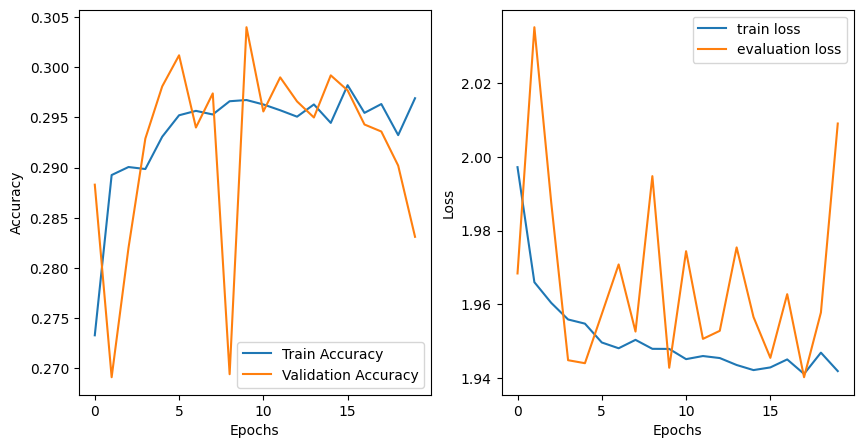

In [21]:
#@title **Coding**. To show the loss and accuracy of the freezing model
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

### **Fine tunning**

A typical way to increase performance is to fine-tunne the weights of the top layers of the pre-trained model. The training process will force to move the weights through a specific dataset. It should be moved "a little" to remains with the feature maps structure


In [ ]:
#@title **Coding** We unfreeze layers to re-train "a little" the network
model_A.trainable = True
print("Total layers of Mobilenet: ", len(model_A.layers))
for layer in model_A.layers[:100]:
  layer.trainable =  False
print("Total layers of Mobilenet: ", len(model_A.layers))

Total layers of Mobilenet:  154
Total layers of Mobilenet:  154


In [ ]:
#@title **Coding** You should see the number of layers to train now...
model_B_on_A.summary()
len(model_B_on_A.trainable_variables)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,283,606 (8.71 MB)

 Trainable params: 1,874,250 (7.15 MB)

 Non-trainable params: 396,544 (1.51 MB)

 Optimizer params: 12,812 (50.05 KB)

56

In [ ]:
#@title **Coding** Now we make the fine tunning to the model
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate/10, momentum=0.9)
model_B_on_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = model_B_on_A.fit(x_train, y_train, epochs=20,verbose=1, batch_size=32,validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 38s 19ms/step - loss: 2.9461 - accuracy: 0.1808 - val_loss: 7.9666 - val_accuracy: 0.1194
Epoch 2/20
1563/1563 [==============================] - 29s 19ms/step - loss: 2.6908 - accuracy: 0.2061 - val_loss: 3.3669 - val_accuracy: 0.1335
Epoch 3/20
1563/1563 [==============================] - 34s 22ms/step - loss: 2.5238 - accuracy: 0.2518 - val_loss: 2.0719 - val_accuracy: 0.2142
Epoch 4/20
1563/1563 [==============================] - 31s 20ms/step - loss: 2.2685 - accuracy: 0.3033 - val_loss: 1.8669 - val_accuracy: 0.2852
Epoch 5/20
1563/1563 [==============================] - 28s 18ms/step - loss: 2.0842 - accuracy: 0.3566 - val_loss: 1.6848 - val_accuracy: 0.3847
Epoch 6/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.8564 - accuracy: 0.4034 - val_loss: 1.9009 - val_accuracy: 0.3275
Epoch 7/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.7823 - accuracy: 0.4313 - val_loss: 1.5287 -

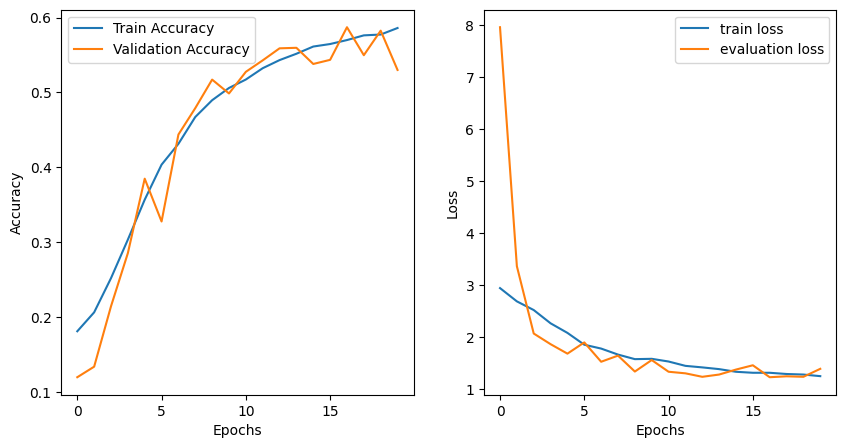

In [ ]:
#@title **Coding**. To show the loss and accuracy of the transfer-learning model
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

### **Adapting net: adding, training, and freezing specific layers**

In some cases, we need to re-train more layers and *personalize* deeply the network. So, we can do same procedure but only freezing the first base layers

In [ ]:
#@title **Coding** We can change as we want the network. For instance, we are going to add new layers
embedding_layer_1 = tf.keras.layers.Dense(256, activation='relu')
embedding_layer_2 = tf.keras.layers.Dense(128, activation='relu')
embedding_layer_p = tf.keras.layers.Dense(10, activation='softmax')

In [ ]:
#@title **Coding** we construct and define which layers to train
model_A.trainable = False
transfer_model = tf.keras.Sequential(model_B_on_A.layers[:-1])
transfer_model.add(embedding_layer_1)
transfer_model.add(embedding_layer_2)
transfer_model.add(embedding_layer_p)
transfer_model.summary()
len(transfer_model.trainable_variables)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

0

In [ ]:
#@title **Coding** 1. First, we should learn only the FC

opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
transfer_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = transfer_model.fit(x_train, y_train, epochs=20,verbose=1, batch_size=32,validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 19s 10ms/step - loss: 1.1186 - accuracy: 0.6063 - val_loss: 1.1129 - val_accuracy: 0.6058
Epoch 2/20
1563/1563 [==============================] - 19s 12ms/step - loss: 1.0568 - accuracy: 0.6232 - val_loss: 1.1073 - val_accuracy: 0.6098
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0483 - accuracy: 0.6249 - val_loss: 1.0991 - val_accuracy: 0.6162
Epoch 4/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0422 - accuracy: 0.6272 - val_loss: 1.1027 - val_accuracy: 0.6146
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0377 - accuracy: 0.6270 - val_loss: 1.1023 - val_accuracy: 0.6149
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0337 - accuracy: 0.6314 - val_loss: 1.1001 - val_accuracy: 0.6129
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0299 - accuracy: 0.6315 - val_loss: 1.1012 - val_

In [ ]:
#@title **Coding** 2. Now, time to fine-tune other layers to see the progress

model_A.trainable = True
print("Total ayers of model_B_on_A: ", len(model_A.layers))
#for layer in model_A.layers[:100]:
#  layer.trainable =  False

transfer_model.summary()
len(transfer_model.trainable_variables)

Total ayers of model_B_on_A:  154
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 256)               327936    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,620,

162

In [ ]:
#@title **Coding** Time to compile the model

opt = tf.keras.optimizers.SGD(learning_rate=learning_rate/500, momentum=0.9)
transfer_model.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = transfer_model.fit(x_train, y_train, epochs=30,verbose=1, batch_size=32,validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 60s 28ms/step - loss: 1.3219 - accuracy: 0.5418 - val_loss: 1.2156 - val_accuracy: 0.5780
Epoch 2/30
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0357 - accuracy: 0.6312 - val_loss: 1.0549 - val_accuracy: 0.6261
Epoch 3/30
1563/1563 [==============================] - 43s 27ms/step - loss: 0.9492 - accuracy: 0.6652 - val_loss: 0.8887 - val_accuracy: 0.6926
Epoch 4/30
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9015 - accuracy: 0.6834 - val_loss: 1.2210 - val_accuracy: 0.5718
Epoch 5/30
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8738 - accuracy: 0.6890 - val_loss: 0.8928 - val_accuracy: 0.6883
Epoch 6/30
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8579 - accuracy: 0.6978 - val_loss: 1.2735 - val_accuracy: 0.5615
Epoch 7/30
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8110 - accuracy: 0.7148 - val_loss: 0.7747 -

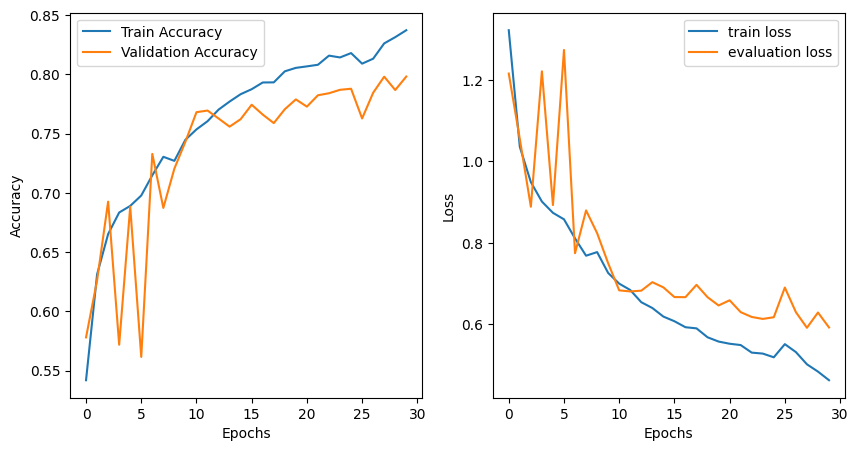

In [ ]:
#@title **Coding**. To show the loss and accuracy of the transfer-learning model
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

### **3.3 Concluding remarks**

<img src="https://github.com/wDavid98/IA-docs/blob/main/data/architectures/TL_1.png?raw=true" style="width:500px">

- A neural network that is **very** deep is expensive to train and also could take weeks to train.
- If new dataset is small and similar to original dataset then you should train the FC layers
- If new dataset is larger and similar to original dataset then we fine-tune through the full network
    - You can freeze the first layers, they are common edges
- Train the entire model but you can summarize the model
    - Add FC layers
    - Set the weights for first layers.

#**CHALLENGE**

- Design different experiments according to figure. Justify the selection of use different classes and levels of transfer learning.
    - Try with  other architecture
- Use a transfer learning strategy to train only middle layers.     

- Use Transfer learning for CIFAR-100

- Now, you have a lot of tools to  start your IA2 project.


Go a head!


#4. **DATA AUGMENTATION** <a name="DA"></a>

Augment the dataset allows to enrich the representation from training data, and allows to avoid some typical variance sources. The actual transformation is rotation, crop, shifts, shear, zoom, flip, reflection, and normalization. For doing so, the `ImageDataGenerator` class allows to generate batches of image data.

In [ ]:
#@title **Coding**: ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_cifar = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, rotation_range=20, horizontal_flip=True)
datagen_cifar.fit(x_train)

<ipython-input-25-0aa8ce02cb4e>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(330 + 1 + i)


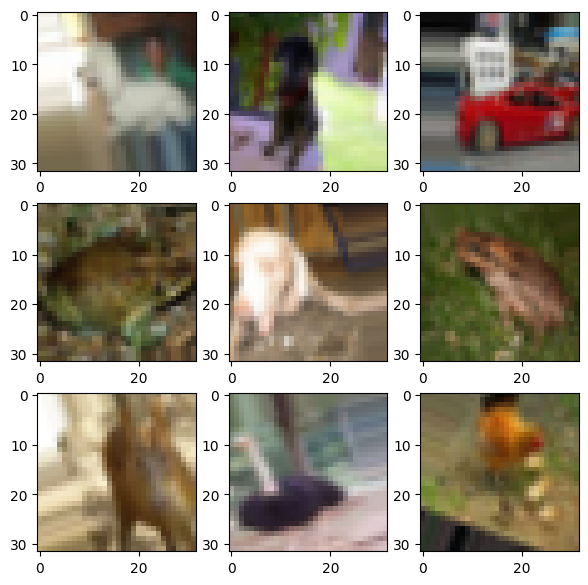

In [ ]:
#@title **Coding** To visualize some transformed data
plt.figure(figsize=(7,7));
plt.xticks([]);
plt.yticks([]);
plt.grid(False);

for X_batch, y_batch in datagen_cifar.flow(x_train, y_train, batch_size=9):
    for i in range(9):
      plt.subplot(330 + 1 + i)
      plt.imshow(X_batch[i].reshape(32, 32, 3), cmap=plt.cm.binary);
    plt.show()
    break

In [ ]:
#@title **Coding** Train model with generated data
it_train = datagen_cifar.flow(x_train, y_train, batch_size=64)
opt = tf.keras.optimizers.SGD(learning_rate=0.0000001, momentum=0.9)
model_B_on_A.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

history = model_B_on_A.fit(
    , epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
782/782 [==============================] - 58s 57ms/step - loss: 1.1589 - accuracy: 0.6498 - val_loss: 0.8343 - val_accuracy: 0.7681
Epoch 2/30
782/782 [==============================] - 43s 55ms/step - loss: 1.1523 - accuracy: 0.6489 - val_loss: 0.8098 - val_accuracy: 0.7581
Epoch 3/30
782/782 [==============================] - 45s 57ms/step - loss: 1.1502 - accuracy: 0.6477 - val_loss: 0.8041 - val_accuracy: 0.7520
Epoch 4/30
782/782 [==============================] - 44s 56ms/step - loss: 1.1446 - accuracy: 0.6504 - val_loss: 0.8003 - val_accuracy: 0.7507
Epoch 5/30
782/782 [==============================] - 43s 55ms/step - loss: 1.1480 - accuracy: 0.6534 - val_loss: 0.7998 - val_accuracy: 0.7487
Epoch 6/30
782/782 [==============================] - 43s 56ms/step - loss: 1.1432 - accuracy: 0.6531 - val_loss: 0.7982 - val_accuracy: 0.7490
Epoch 7/30
782/782 [==============================] - 43s 55ms/step - loss: 1.1409 - accuracy: 0.6519 - val_loss: 0.7965 - val_accuracy:

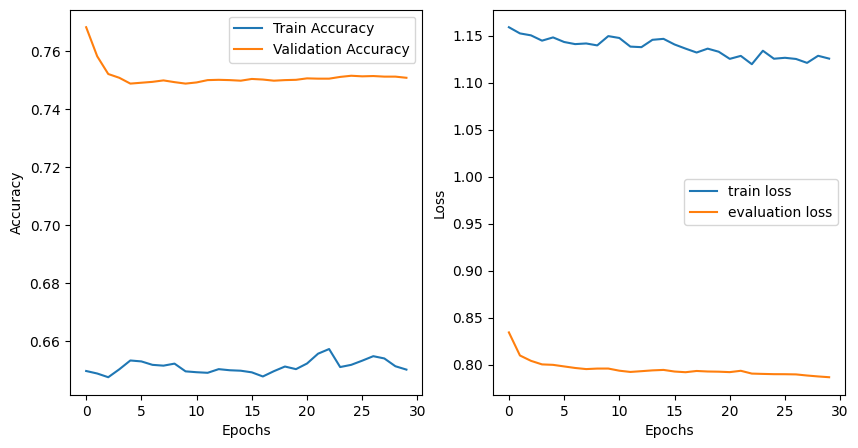

In [ ]:
#@title **Coding**. To show the loss and accuracy of the transfer-learning model
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

# **Additional tricks because computational cost!**
**Save the model**

You can save the model and then reload to continous the training or to test in other scenarios.

In [ ]:
#@title **Coding** Saving the model
model_B_on_A.save('models/CNN_withDataAug.h5')
model_saved = tf.keras.models.load_model('models/CNN_withDataAug.h5')
model_saved.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 2,236,682
Non-trainable params: 34,112
_________________________________________________________________


In [ ]:
#@title **Coding** prepare the model to save
model_saved = tf.keras.models.load_model('models/CNN_withDataAug.h5')
model_saved.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1, 1, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 2,236,682
Non-trainable params: 34,112
_________________________________________________________________


**Callbacks**

They are a set of funtionalities given during training stages. You can now control the training.

- `EarlyStopping`
  - Avoid overfitting and may finish the training in an early stage-
  - There exist some parameters to control:
    - `monitor` value to being monitored: lost
    - `min_delta` minimun change to generate and alert and stopping
    - `patient` number of epochs with no improvement.
    - `restore_best_weights` set this metric in True to keep the best weights once training stop.

In [ ]:
#@title **Coding** Early stopping
from tensorflow.keras.callbacks import EarlyStopping

it_train = datagen_cifar.flow(x_train, y_train, batch_size=64)
early_stopping = EarlyStopping(patience=3, restore_best_weights = True)
history = model_B_on_A.fit(it_train, epochs=30, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/30
782/782 [==============================] - 52s 66ms/step - loss: 1.1252 - accuracy: 0.6526 - val_loss: 0.7885 - val_accuracy: 0.7513
Epoch 2/30
782/782 [==============================] - 44s 56ms/step - loss: 1.1135 - accuracy: 0.6566 - val_loss: 0.7869 - val_accuracy: 0.7512
Epoch 3/30
782/782 [==============================] - 45s 58ms/step - loss: 1.1205 - accuracy: 0.6521 - val_loss: 0.7852 - val_accuracy: 0.7515
Epoch 4/30
782/782 [==============================] - 43s 55ms/step - loss: 1.1171 - accuracy: 0.6531 - val_loss: 0.7871 - val_accuracy: 0.7513
Epoch 5/30
782/782 [==============================] - 44s 56ms/step - loss: 1.1009 - accuracy: 0.6567 - val_loss: 0.7880 - val_accuracy: 0.7513
Epoch 6/30
782/782 [==============================] - 45s 58ms/step - loss: 1.1143 - accuracy: 0.6550 - val_loss: 0.7864 - val_accuracy: 0.7511


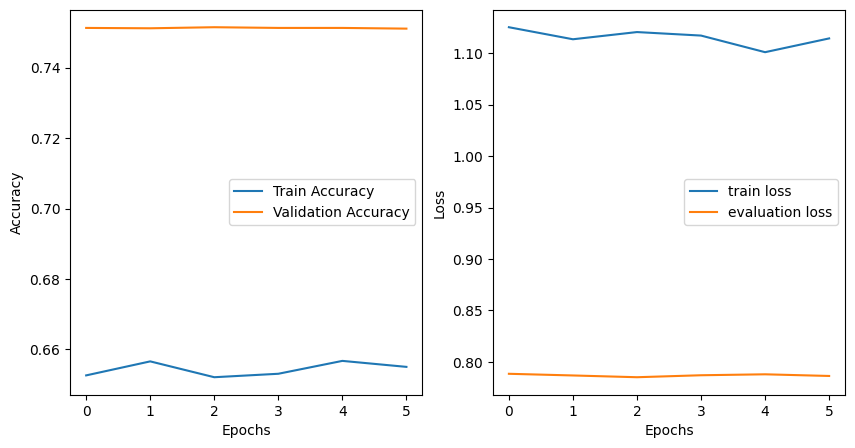

In [ ]:
#@title **Coding**. To show the loss and accuracy of the transfer-learning model
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['accuracy'], label='Train Accuracy');
ax.plot(history.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['loss'], label='train loss');
ax.plot(history.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');

**Other  Callbakcs**

- `ModelCheckpoint` save the model after every epoch.
  - `filepath`: the path to save the model
  - `save_best_only`: overwrite only the ebst model
  - `monitor='val_loss'`


An example is here:



```
from keras.callbacks import ModelCheckpointcheckpoint = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
                             ```





#**CHALLENGE**
- Implement a training scheme using `LearningRateScheduler` . Explain it.
- Implement a training scheme using `ModelCheckpointcheckpoint` . Compare results and discuss about training time.

In [ ]:
#@title **Student code**
"""
Put your code here
"""

# References

[1. A guide to convolution arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf)

[2. Popular networks](https://neurohive.io/en/popular-networks/vgg16/)

[3. Keras applications](https://keras.io/applications/)

[4. A Survey of the Recent Architectures of Deep Convolutional Neural Networks](https://arxiv.org/pdf/1901.06032.pdf)